In [229]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/programming-assignment-linear-regression/ex1data2.txt
/kaggle/input/programming-assignment-linear-regression/ex1data1.csv
/kaggle/input/programming-assignment-linear-regression/ex1data1.txt
/kaggle/input/programming-assignment-linear-regression/ex1data2.csv


<font style='font-size: 20px;'>Here I'll predict the food truck profits according to a city's population.</font><br>
<font style='font-size: 20px;'>Hypothesis - Profit will directly increase with increase in population.</font>

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [231]:
dataset = pd.read_csv('../input/programming-assignment-linear-regression/ex1data1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [233]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [234]:
y_lin_pred = regressor.predict(X_test)

In [235]:
print(regressor.predict([[5.0]]))

[2.0725141]


In [236]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lin_pred)

0.5362701266498038

In [237]:
print(regressor.coef_)
print(regressor.intercept_)

[1.16995889]
-3.777280344712657


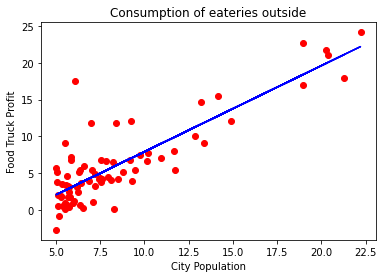

In [238]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Consumption of eateries outside')
plt.xlabel('City Population')
plt.ylabel('Food Truck Profit')
plt.show()

<font style = 'font-size: 20px;'>-> Hypothesis is assumed correct.</font><br>
<font style = 'font-size: 20px;'>-> As the population increases, consumption of street-side food increases.</font><br>
<font style = 'font-size: 20px;'>-> For every 2.5 units increase in population, the profit increases by 1.170.</font><br>
<font style = 'font-size: 20px;'>-> If the population is 0, then the food trucks have to bear a loss of 3.777 units because SP = 0 units.</font><br>
<font style = 'font-size: 20px;'>-> But for a considerate amount(till 12.5) population, the profit lingered around 0-5 units. Till 12.5 the profit didn't increase as predicted by the regression line hence the accuracy ~53%. So we can say that population does not impact directly to the profit and some more variables are required to effectively predict the food truck sales.</font>

# Polynomial Regression

In [239]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y_train)

LinearRegression()

In [240]:
y_poly_pred = poly_lin_reg.predict(poly_reg.fit_transform(X_test))

In [241]:
from sklearn.metrics import r2_score
r2_score(y_test, y_poly_pred)

0.4972044350822875

# Decision Tree Regression

In [242]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor(random_state = 0)
decision_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [243]:
y_decision_pred = decision_reg.predict(X_test)

In [244]:
from sklearn.metrics import r2_score
r2_score(y_test, y_decision_pred)

0.018707305981223055

# Random Tree Regressor

In [245]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [246]:
y_random_pred = random_reg.predict(X_test)

In [247]:
from sklearn.metrics import r2_score
r2_score(y_test, y_random_pred)

0.4097344846441513